# Data Analysis for MultiClaim Sample Data

In [2]:
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from src.datasets import TextConcatPosts, TextConcatFactCheck

POSTS_PATH = "data/complete_data/posts.csv"
FACT_CHECKS_PATH = "data/complete_data/fact_checks.csv"
TASKS_PATH = "data/splits/tasks.json"
GS_PATH = "data/complete_data/pairs.csv"
PHASE1_TASKS_PATH = "data/complete_data/tasks.json"
OUTPUT_PATH = "out"
LANGS = ['eng', 'fra', 'deu', 'por', 'spa', 'tha',  'msa', 'ara']

TASK_NAME = "monolingual"
LANG = "eng"

time_start = time()
posts = TextConcatPosts(POSTS_PATH, TASKS_PATH, task_name=TASK_NAME, gs_path=GS_PATH, lang=LANG)
print(f"Loaded {len(posts)}")
print(f"Time taken: {time() - time_start:.2f}s\n")

print("Loading fact checks..")
time_start = time()
fact_checks = TextConcatFactCheck(FACT_CHECKS_PATH, TASKS_PATH, task_name=TASK_NAME, lang=LANG)
print(f"Loaded {len(fact_checks)}")
print(f"Time taken: {time() - time_start:.2f}s\n")

Loaded 24431
Time taken: 1.80s

Loading fact checks..
Loaded 85734
Time taken: 6.72s



# Veredict Analysis

In [3]:
df_posts_total = posts.df
df_train_en = df_posts_total.loc[posts.idx_train]
df_dev_en = df_posts_total.loc[posts.idx_dev]

df_fc = fact_checks.df

import pandas as pd
df_lang_dist = pd.DataFrame()
df_lang_dist["train"] = df_train_en.lan.value_counts()
df_lang_dist["dev"] = df_dev_en.lan.value_counts()
df_lang_dist

,train,dev
lan,,
eng,4095,450.0
other,218,22.0
msa,15,1.0
tha,10,NaN
fra,4,1.0
spa,3,2.0
ara,3,1.0
,2,NaN
deu,1,1.0


In [19]:
df_posts_total

,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs
post_id,,,,,,,,,
0,! Dreister Impf-Fake von Markus Söder! Es ist ...,False information,,deu,1,0,0,! Dreister Impf-Fake von Markus Söder! Es ist ...,[87108]
1,!! WARNING !! A new thing circulating now. Peo...,False information,,eng,1,0,0,!! WARNING !! A new thing circulating now. Peo...,[]
2,"""Actually, he's a damn sight better than any o...",Missing context,,eng,2,0,0,"""Actually, he's a damn sight better than any o...",[93524]
3,"""Australia 50 MILLONES de dosis de ""vacuna"" re...",False,,fra,0,0,1,"""Australia 50 MILLONES de dosis de ""vacuna"" re...",[50973]
4,"""Bienaventurados los perseguidos por mi causa ...",,,spa,1,0,0,"""Bienaventurados los perseguidos por mi causa ...",[80729]
...,...,...,...,...,...,...,...,...,...
28085,,Partly false information,🧐Se separó el presidente...la constitución de ...,spa,2,0,0,🧐Se separó el presidente...la constitución de...,[52635]
28087,bruising runny ed 1 e Contents of the pack and...,Missing context,🧐🧐🧐,eng,1,0,0,bruising runny ed 1 e Contents of the pack and...,[21743]
28089,,Partly false information,"🧬Robert Malone, inventeur de la technologie AR...",fra,1,0,0,"🧬Robert Malone, inventeur de la technologie A...",[79279]


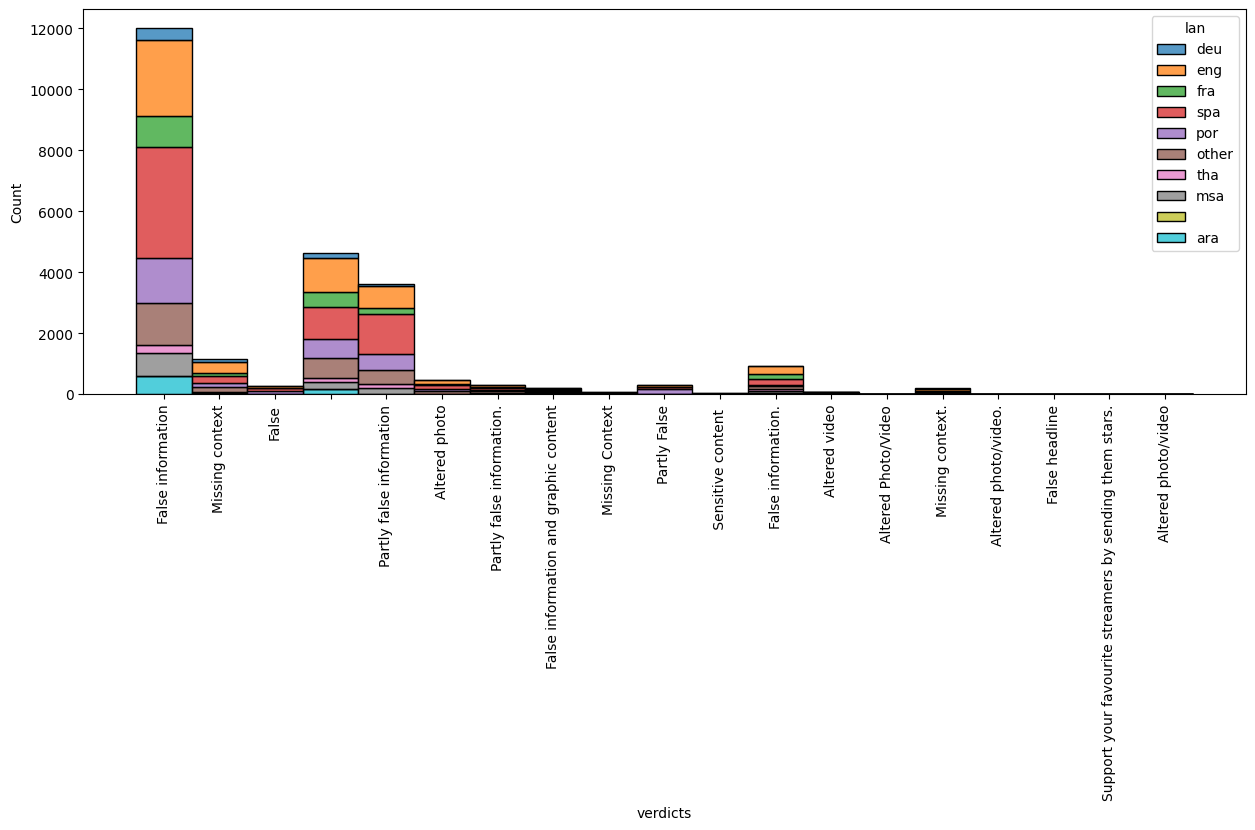

In [29]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_posts_total,  x="verdicts", hue="lan", multiple="stack")
plt.xticks(rotation=90);  # Rotate x-axis labels for better readability


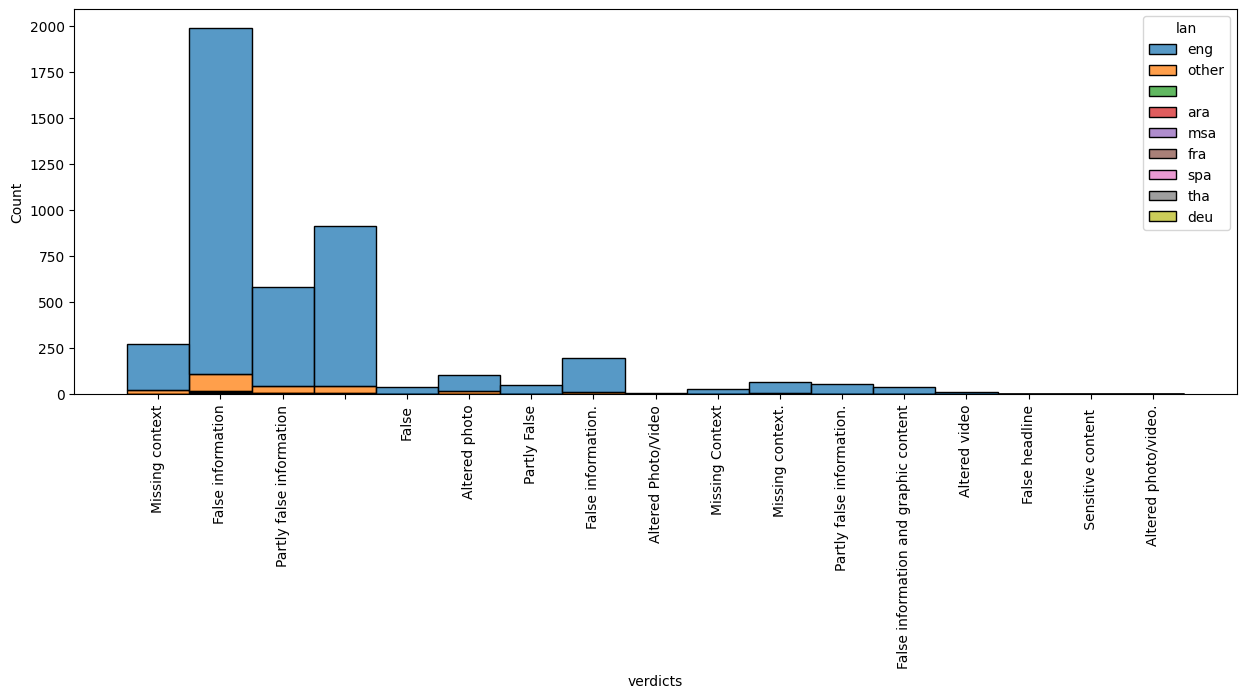

In [30]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_train_en,  x="verdicts", hue="lan", multiple="stack")
plt.xticks(rotation=90);  # Rotate x-axis labels for better readability

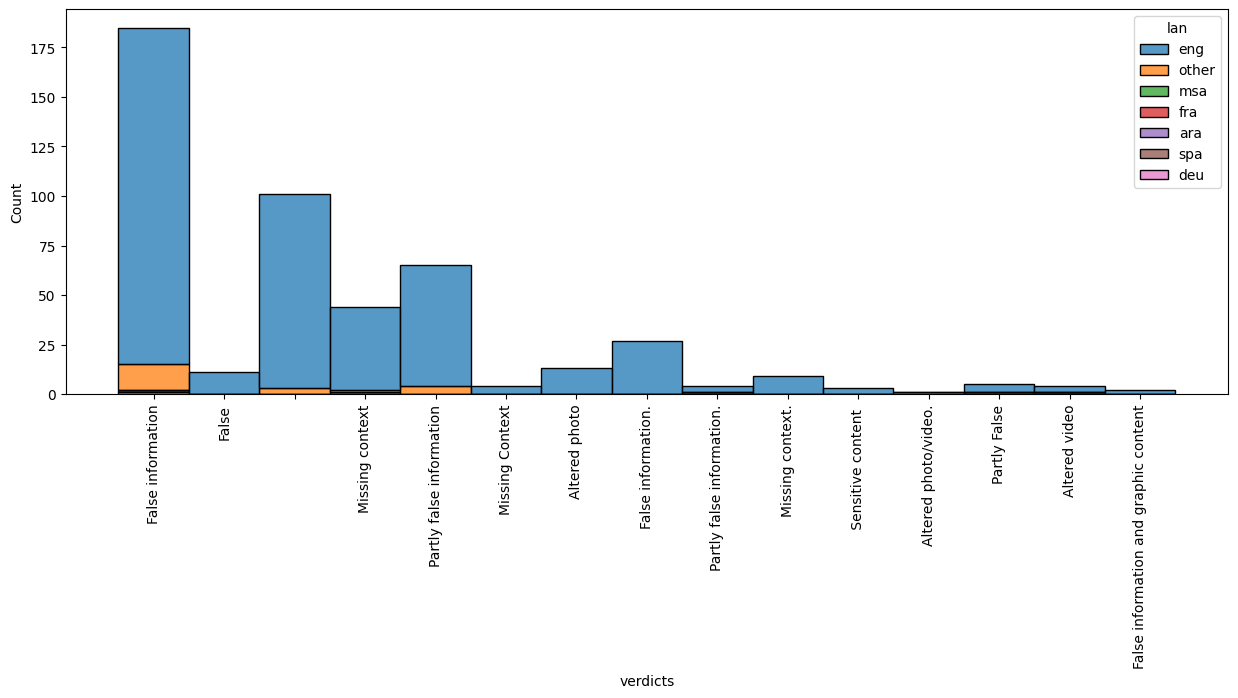

In [31]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_dev_en,  x="verdicts", hue="lan", multiple="stack")
plt.xticks(rotation=90);  # Rotate x-axis labels for better readability


# Error Analysis

In [35]:
df_posts_total

,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs
post_id,,,,,,,,,
0,! Dreister Impf-Fake von Markus Söder! Es ist ...,False information,,deu,1,0,0,! Dreister Impf-Fake von Markus Söder! Es ist ...,[87108]
1,!! WARNING !! A new thing circulating now. Peo...,False information,,eng,1,0,0,!! WARNING !! A new thing circulating now. Peo...,[]
2,"""Actually, he's a damn sight better than any o...",Missing context,,eng,2,0,0,"""Actually, he's a damn sight better than any o...",[93524]
3,"""Australia 50 MILLONES de dosis de ""vacuna"" re...",False,,fra,0,0,1,"""Australia 50 MILLONES de dosis de ""vacuna"" re...",[50973]
4,"""Bienaventurados los perseguidos por mi causa ...",,,spa,1,0,0,"""Bienaventurados los perseguidos por mi causa ...",[80729]
...,...,...,...,...,...,...,...,...,...
28085,,Partly false information,🧐Se separó el presidente...la constitución de ...,spa,2,0,0,🧐Se separó el presidente...la constitución de...,[52635]
28087,bruising runny ed 1 e Contents of the pack and...,Missing context,🧐🧐🧐,eng,1,0,0,bruising runny ed 1 e Contents of the pack and...,[21743]
28089,,Partly false information,"🧬Robert Malone, inventeur de la technologie AR...",fra,1,0,0,"🧬Robert Malone, inventeur de la technologie A...",[79279]


In [62]:
import json
preds_path = "output/e5_large/monolingual/20241020-220834/monolingual_predictions.json"

d_preds = json.load(open(preds_path, "r"))
df_preds_id = pd.DataFrame(d_preds).T.apply(list, axis=1).reset_index().rename(columns={"index":"post_id", 0: "preds"})
df_preds_id["post_id"] = df_preds_id["post_id"] .astype(int)
df_dev_preds = df_posts_total.reset_index().merge(df_preds_id, on="post_id", how="inner")
# df_dev_preds

df_dev_preds["correct"] = df_dev_preds.apply(lambda x: len(list(set(x["gs"]).intersection(set(x["preds"])))) > 0, axis=1)
df_dev_preds["verdicts"] = df_dev_preds["verdicts"].str.replace(".", "").str.lower().str.strip()
df_dev_preds

,post_id,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,preds,correct
0,18,"""HOJE É UM GRANDE DIA. SE VOCÊ ESTIVER TOTALME...",,,por,0,0,1,"""HOJE É UM GRANDE DIA. SE VOCÊ ESTIVER TOTALME...",[96778],"[96778, 54056, 15224, 111370, 25637, 110791, 1...",True
1,24,"""Lo peor de la peste no es que mata a los cuer...",false information,,spa,1,0,0,"""Lo peor de la peste no es que mata a los cuer...",[84148],"[84148, 27584, 80815, 50760, 39651, 3211, 6006...",True
2,80,** HONDURAS POP: 8.2 MILLION SWITZERLAND POP: ...,partly false information,,eng,1,0,0,** HONDURAS POP: 8.2 MILLION SWITZERLAND POP: ...,[21053],"[66366, 21053, 24454, 122851, 5642, 121201, 38...",True
3,145,10:17 El puente que prometió el Presi en campa...,false information,,spa,1,0,0,10:17 El puente que prometió el Presi en campa...,[110778],"[87808, 8291, 87809, 52874, 64620, 81094, 1369...",False
4,198,17 Brave Daughter of Col. Santosh Babu. RIP SI...,false information,,eng,1,0,0,17 Brave Daughter of Col. Santosh Babu. RIP SI...,[104331],"[131764, 65288, 115739, 42737, 104331, 131980,...",True
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,27948,EPSTEIN'S FORMER PILOT NAMES HIGH PROFILE PASS...,altered photo,🟢🟢 Affaire Epstein : le pilote de l'avion qui ...,fra,1,0,0,EPSTEIN'S FORMER PILOT NAMES HIGH PROFILE PASS...,[118280],"[75020, 118280, 118260, 58297, 7167, 16934, 93...",True
1431,27965,LOS 7 DE SEPTIEMBRE 1985 EXPRESO TA A LA ROTON...,partly false information,"🟩 UN 7 DE SEPTIEMBRE… Dato curioso, el 7 de se...",spa,1,0,0,LOS 7 DE SEPTIEMBRE 1985 EXPRESO TA A LA ROTON...,[60093],"[60093, 50059, 137281, 51543, 69504, 157112, 5...",True
1432,27967,95 BANCO DE COLOM 5619 0 50 SALARIO MÍNIMO 202...,partly false information,🤐😠🤬😠😠😠 Por eso tanto pueblo migrando a otros p...,spa,1,0,0,95 BANCO DE COLOM 5619 0 50 SALARIO MÍNIMO 202...,[51436],"[51436, 51434, 51433, 115426, 156720, 56927, 6...",True
1433,27973,On the left is the former Vice President of Mo...,partly false information,🤔,eng,1,0,0,On the left is the former Vice President of Mo...,[88749],"[15981, 128838, 155236, 48446, 200767, 103637,...",False


In [65]:
df_dev_preds.groupby("verdicts").correct.agg(["mean", "count", "sum"])

,mean,count,sum
verdicts,,,
,0.827206,272,225
altered photo,0.705882,34,24
altered photo/video,1.000000,1,1
altered video,0.666667,3,2
false,1.000000,10,10
false information,0.855524,706,604
false information and graphic content,0.666667,9,6
missing context,0.777778,72,56
partly false,0.941176,17,16


In [ ]:
df_dev_preds

In [66]:
"False information", "Partly false information", "Missing context", "Altered photo/video"

('False information',
 'Partly false information',
 'Missing context',
 'Altered photo/video')

In [68]:
df_dev_preds[df_dev_preds.verdicts.str.contains("video")]

,post_id,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,preds,correct
192,3773,,altered video,#atención: 🔴candidato correísta habla del mode...,spa,1,0,0,#atención: 🔴candidato correísta habla del mod...,[50645],"[50645, 50643, 50641, 25180, 25181, 51253, 251...",True
299,5574,= detiknews Home Berita Jabodetabek Jawa Timur...,altered photo/video,Akhirnya gayung pun bersambut Kiblat baru bagi...,msa,1,0,0,= detiknews Home Berita Jabodetabek Jawa Timur...,[132894],"[76423, 61900, 132894, 108645, 108646, 199210,...",True
570,10534,VOTE GOO FILBERT FIFTEENS forgood.org.za GOOD,altered video,"Finally, Peter talking some sense. Obviously p...",eng,1,0,0,VOTE GOO FILBERT FIFTEENS forgood.org.za GOOD ...,[55234],"[6930, 2527, 1834, 2774, 56194, 76598, 93659, ...",False
861,15767,,altered video,"Oirán bien!! Advertidos estamos, no es hora de...",spa,1,0,0,"Oirán bien!! Advertidos estamos, no es hora d...",[50645],"[51346, 83168, 50641, 50643, 50645, 92965, 150...",True


In [74]:
df_error_photo = df_dev_preds[df_dev_preds.verdicts.str.contains("photo")&(~df_dev_preds.correct)].explode("gs")
df_error_photo

,post_id,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,preds,correct
121,2222,"WE MARCH, y'all mad. WE SIT DOWN, y'all mad. W...",altered photo,,eng,2,0,0,"WE MARCH, y'all mad. WE SIT DOWN, y'all mad. W...",103966,"[19701, 82936, 131, 47857, 129347, 82928, 3457...",False
405,7176,,altered photo,CMS MÉDIA Cette photo est lourde. Vous ne trou...,fra,1,0,0,CMS MÉDIA Cette photo est lourde. Vous ne tro...,138138,"[36636, 36612, 36562, 138001, 36660, 36649, 82...",False
406,7178,,altered photo,CMS MÉDIA Cette photo est lourde. Vous ne trou...,fra,1,0,0,CMS MÉDIA Cette photo est lourde. Vous ne tro...,138138,"[36636, 36612, 36562, 138001, 36649, 82403, 36...",False
419,7503,,altered photo,Cette photo est lourde. Vous ne trouverez plus...,fra,2,0,0,Cette photo est lourde. Vous ne trouverez plu...,138138,"[36612, 36562, 83461, 36636, 36614, 36649, 366...",False
421,7507,,altered photo,"Cette photos est lourde,très très lourde même....",fra,1,0,0,"Cette photos est lourde,très très lourde même...",138138,"[137235, 36683, 36614, 36562, 138001, 36612, 3...",False
587,10808,wenderenriquedeverdad El del medio es Gustavo ...,altered photo,GUSTAVO PETRO O PROTEGIDO DE LULA,spa,1,0,0,wenderenriquedeverdad El del medio es Gustavo ...,59351,"[64128, 53962, 64160, 64130, 64129, 137575, 55...",False
757,13695,,altered photo,"Les hommes forts Sankara, Mandela, Malcolm X, ...",fra,1,0,0,"Les hommes forts Sankara, Mandela, Malcolm X,...",138138,"[36612, 79421, 36636, 36614, 137289, 36646, 74...",False
804,14619,,altered photo,Mohammad Saalan T-Shirt Suura Haacaaluu fi Jaw...,eng,1,0,0,Mohammad Saalan T-Shirt Suura Haacaaluu fi Ja...,49436,"[108534, 146944, 196302, 26847, 105883, 149497...",False
1002,18479,NO chille USTED VOTÓ POR AMLO 45.000 10,altered photo,Sin Yolanda,spa,1,0,0,NO chille USTED VOTÓ POR AMLO 45.000 10 Sin Yo...,35924,"[11758, 147106, 20491, 195987, 53409, 67354, 1...",False
1010,18583,BAC in tar ELIFES 198.8 Super E10 199.9 Super ...,altered photo,So zynisch nutzt die Regierung die Auswirkunge...,deu,1,0,0,BAC in tar ELIFES 198.8 Super E10 199.9 Super ...,45594,"[31076, 149333, 68220, 65055, 60176, 60175, 42...",False


In [81]:
df_error_photo.merge(df_fc.reset_index().rename(columns={"fact_check_id": "gs"}), on="gs", how="left")

,post_id,ocr,verdicts,text,lan,fb,tw,ig,full_text_x,gs,preds,correct,claim,instances,title,full_text_y
0,2222,"WE MARCH, y'all mad. WE SIT DOWN, y'all mad. W...",altered photo,,eng,2,0,0,"WE MARCH, y'all mad. WE SIT DOWN, y'all mad. W...",103966,"[19701, 82936, 131, 47857, 129347, 82928, 3457...",False,Photo shows US basketball star LeBron James we...,[https://factcheck.afp.com/lebron-james-shirt-...,"LeBron James’ shirt did not say ‘WE DIE, y’all...","LeBron James’ shirt did not say ‘WE DIE, y’all..."
1,7176,,altered photo,CMS MÉDIA Cette photo est lourde. Vous ne trou...,fra,1,0,0,CMS MÉDIA Cette photo est lourde. Vous ne tro...,138138,"[36636, 36612, 36562, 138001, 36660, 36649, 82...",False,NaN,NaN,NaN,NaN
2,7178,,altered photo,CMS MÉDIA Cette photo est lourde. Vous ne trou...,fra,1,0,0,CMS MÉDIA Cette photo est lourde. Vous ne tro...,138138,"[36636, 36612, 36562, 138001, 36649, 82403, 36...",False,NaN,NaN,NaN,NaN
3,7503,,altered photo,Cette photo est lourde. Vous ne trouverez plus...,fra,2,0,0,Cette photo est lourde. Vous ne trouverez plu...,138138,"[36612, 36562, 83461, 36636, 36614, 36649, 366...",False,NaN,NaN,NaN,NaN
4,7507,,altered photo,"Cette photos est lourde,très très lourde même....",fra,1,0,0,"Cette photos est lourde,très très lourde même...",138138,"[137235, 36683, 36614, 36562, 138001, 36612, 3...",False,NaN,NaN,NaN,NaN
5,10808,wenderenriquedeverdad El del medio es Gustavo ...,altered photo,GUSTAVO PETRO O PROTEGIDO DE LULA,spa,1,0,0,wenderenriquedeverdad El del medio es Gustavo ...,59351,"[64128, 53962, 64160, 64130, 64129, 137575, 55...",False,NaN,NaN,NaN,NaN
6,13695,,altered photo,"Les hommes forts Sankara, Mandela, Malcolm X, ...",fra,1,0,0,"Les hommes forts Sankara, Mandela, Malcolm X,...",138138,"[36612, 79421, 36636, 36614, 137289, 36646, 74...",False,NaN,NaN,NaN,NaN
7,14619,,altered photo,Mohammad Saalan T-Shirt Suura Haacaaluu fi Jaw...,eng,1,0,0,Mohammad Saalan T-Shirt Suura Haacaaluu fi Ja...,49436,"[108534, 146944, 196302, 26847, 105883, 149497...",False,Egyptian football players wearing T-shirts wit...,[https://factcheck.afp.com/doc.afp.com.32EW89Q...,Faces of Oromo activists digitally added to T-...,Faces of Oromo activists digitally added to T-...
8,18479,NO chille USTED VOTÓ POR AMLO 45.000 10,altered photo,Sin Yolanda,spa,1,0,0,NO chille USTED VOTÓ POR AMLO 45.000 10 Sin Yo...,35924,"[11758, 147106, 20491, 195987, 53409, 67354, 1...",False,NaN,NaN,NaN,NaN
9,18583,BAC in tar ELIFES 198.8 Super E10 199.9 Super ...,altered photo,So zynisch nutzt die Regierung die Auswirkunge...,deu,1,0,0,BAC in tar ELIFES 198.8 Super E10 199.9 Super ...,45594,"[31076, 149333, 68220, 65055, 60176, 60175, 42...",False,NaN,NaN,NaN,NaN


In [82]:
df_fcs_orig = pd.read_csv("data/complete_data/fact_checks.csv")
df_fcs_orig

,fact_check_id,claim,instances,title
0,0,"(' Are avocados good for you?', ' Are avocados...","[(1525653998.0, 'https://metafact.io/factcheck...",NaN
1,1,"(' Can animals have headaches?', ' Can animals...","[(1617955634.0, 'https://metafact.io/factcheck...",NaN
2,2,"("" Can we help prevent Alzheimer's with diet?""...","[(1525653998.0, 'https://metafact.io/factcheck...",NaN
3,3,(' Do any benefits of alcohol outweigh the ris...,"[(1525653998.0, 'https://metafact.io/factcheck...",NaN
4,4,"(' Does acupuncture work for headaches?', ' Do...","[(1617955595.0, 'https://metafact.io/factcheck...",NaN
...,...,...,...,...
153738,205744,('🇫🇷 في فرنسا ، يقرر رجال الشرطة العسكرية والم...,"[(1617976680.0, 'https://factuel.afp.com/ar/Fr...",('هذا الفيديو ليس لتحرّك الشرطة الفرنسيّة ضدّ ...
153739,205745,('👆This little beautiful girl was seen in Mang...,"[(1576281540.0, 'https://youturn.in/articles/c...",('மங்களூரில் பிச்சை எடுக்கும் குழுவில் மீட்கப்...
153740,205747,('📌إيطاليين و أجانب رجال و نساء ، أطفال و عجزة...,"[(1616693700.0, 'https://factuel.afp.com/ar/th...",('هذه الصور لطابورٍ أمام مركز توزيع مساعدات غذ...
153741,205749,('🔵Confirmado... Amanhã acabarão as mensagens ...,"[(1570924680.0, 'https://www.boatos.org/tecnol...",('WhatsApp vai cobrar 0.37 centavos por mensag...


In [84]:
df_fcs_orig.rename(columns={"fact_check_id": "gs"})

,gs,claim,instances,title
0,0,"(' Are avocados good for you?', ' Are avocados...","[(1525653998.0, 'https://metafact.io/factcheck...",NaN
1,1,"(' Can animals have headaches?', ' Can animals...","[(1617955634.0, 'https://metafact.io/factcheck...",NaN
2,2,"("" Can we help prevent Alzheimer's with diet?""...","[(1525653998.0, 'https://metafact.io/factcheck...",NaN
3,3,(' Do any benefits of alcohol outweigh the ris...,"[(1525653998.0, 'https://metafact.io/factcheck...",NaN
4,4,"(' Does acupuncture work for headaches?', ' Do...","[(1617955595.0, 'https://metafact.io/factcheck...",NaN
...,...,...,...,...
153738,205744,('🇫🇷 في فرنسا ، يقرر رجال الشرطة العسكرية والم...,"[(1617976680.0, 'https://factuel.afp.com/ar/Fr...",('هذا الفيديو ليس لتحرّك الشرطة الفرنسيّة ضدّ ...
153739,205745,('👆This little beautiful girl was seen in Mang...,"[(1576281540.0, 'https://youturn.in/articles/c...",('மங்களூரில் பிச்சை எடுக்கும் குழுவில் மீட்கப்...
153740,205747,('📌إيطاليين و أجانب رجال و نساء ، أطفال و عجزة...,"[(1616693700.0, 'https://factuel.afp.com/ar/th...",('هذه الصور لطابورٍ أمام مركز توزيع مساعدات غذ...
153741,205749,('🔵Confirmado... Amanhã acabarão as mensagens ...,"[(1570924680.0, 'https://www.boatos.org/tecnol...",('WhatsApp vai cobrar 0.37 centavos por mensag...


In [85]:
df_error_photo.merge(df_fcs_orig.rename(columns={"fact_check_id": "gs"}), on="gs", how="left")

,post_id,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,preds,correct,claim,instances,title
0,2222,"WE MARCH, y'all mad. WE SIT DOWN, y'all mad. W...",altered photo,,eng,2,0,0,"WE MARCH, y'all mad. WE SIT DOWN, y'all mad. W...",103966,"[19701, 82936, 131, 47857, 129347, 82928, 3457...",False,('Photo shows US basketball star LeBron James ...,"[(1618610820.0, 'https://factcheck.afp.com/leb...","('LeBron James’ shirt did not say ‘WE DIE, y’a..."
1,7176,,altered photo,CMS MÉDIA Cette photo est lourde. Vous ne trou...,fra,1,0,0,CMS MÉDIA Cette photo est lourde. Vous ne tro...,138138,"[36636, 36612, 36562, 138001, 36660, 36649, 82...",False,('Une photo regroupant des figures marquantes ...,"[(1606503060.0, 'https://factuel.afp.com/cette...",('Cette photo réunissant des grandes figures a...
2,7178,,altered photo,CMS MÉDIA Cette photo est lourde. Vous ne trou...,fra,1,0,0,CMS MÉDIA Cette photo est lourde. Vous ne tro...,138138,"[36636, 36612, 36562, 138001, 36649, 82403, 36...",False,('Une photo regroupant des figures marquantes ...,"[(1606503060.0, 'https://factuel.afp.com/cette...",('Cette photo réunissant des grandes figures a...
3,7503,,altered photo,Cette photo est lourde. Vous ne trouverez plus...,fra,2,0,0,Cette photo est lourde. Vous ne trouverez plu...,138138,"[36612, 36562, 83461, 36636, 36614, 36649, 366...",False,('Une photo regroupant des figures marquantes ...,"[(1606503060.0, 'https://factuel.afp.com/cette...",('Cette photo réunissant des grandes figures a...
4,7507,,altered photo,"Cette photos est lourde,très très lourde même....",fra,1,0,0,"Cette photos est lourde,très très lourde même...",138138,"[137235, 36683, 36614, 36562, 138001, 36612, 3...",False,('Une photo regroupant des figures marquantes ...,"[(1606503060.0, 'https://factuel.afp.com/cette...",('Cette photo réunissant des grandes figures a...
5,10808,wenderenriquedeverdad El del medio es Gustavo ...,altered photo,GUSTAVO PETRO O PROTEGIDO DE LULA,spa,1,0,0,wenderenriquedeverdad El del medio es Gustavo ...,59351,"[64128, 53962, 64160, 64130, 64129, 137575, 55...",False,('Foto mostra o colombiano Gustavo Petro junto...,"[(1654542780.0, 'https://checamos.afp.com/doc....",('É uma montagem a foto do candidato à presidê...
6,13695,,altered photo,"Les hommes forts Sankara, Mandela, Malcolm X, ...",fra,1,0,0,"Les hommes forts Sankara, Mandela, Malcolm X,...",138138,"[36612, 79421, 36636, 36614, 137289, 36646, 74...",False,('Une photo regroupant des figures marquantes ...,"[(1606503060.0, 'https://factuel.afp.com/cette...",('Cette photo réunissant des grandes figures a...
7,14619,,altered photo,Mohammad Saalan T-Shirt Suura Haacaaluu fi Jaw...,eng,1,0,0,Mohammad Saalan T-Shirt Suura Haacaaluu fi Ja...,49436,"[108534, 146944, 196302, 26847, 105883, 149497...",False,('Egyptian football players wearing T-shirts w...,"[(1658254140.0, 'https://factcheck.afp.com/doc...",('Faces of Oromo activists digitally added to ...
8,18479,NO chille USTED VOTÓ POR AMLO 45.000 10,altered photo,Sin Yolanda,spa,1,0,0,NO chille USTED VOTÓ POR AMLO 45.000 10 Sin Yo...,35924,"[11758, 147106, 20491, 195987, 53409, 67354, 1...",False,('Cartel de venta de limones donde critica a v...,"[(1643659920.0, 'https://factual.afp.com/doc.a...",('El cartel del precio de los limones que crit...
9,18583,BAC in tar ELIFES 198.8 Super E10 199.9 Super ...,altered photo,So zynisch nutzt die Regierung die Auswirkunge...,deu,1,0,0,BAC in tar ELIFES 198.8 Super E10 199.9 Super ...,45594,"[31076, 149333, 68220, 65055, 60176, 60175, 42...",False,('Diese Tankstelle zeigt den Preis fürs Fahrra...,"[(1648218060.0, 'https://faktencheck.afp.com/d...","('Nein, diese Tankstelle listet kein Fahrradsy..."


In [ ]:
import numpy as np
en_train_gs = df_dev_preds.explode("gs").gs.unique()
en_fc = df_fc.index

difference = [int(x) for x in en_train_gs) if x not in list(en_fc)] 
difference_glob = [int(x) for x in en_train_gs if x not in df_fcs_orig.fact_check_id] 
print("Train:", en_train_gs.shape[0])
print("Out of the gs:", len(difference))
print("out of the global gs:", len(difference_glob))


Train: 897
Out of the gs: 676
out of the global gs: 92


[]

In [104]:
df_dev_preds.loc[138138, :]

KeyError: 138138